In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
daily_sales = pd.read_csv('daily_sales.csv')
monthly_sales = pd.read_csv("monthly_sales.csv")

## Daily

In [155]:
daily_sales = daily_sales.rename({"Unnamed: 0":"Weekday"},axis = 1)

In [47]:
mean_sales_each_weekday = daily_sales.groupby(['Weekday']).mean()

In [106]:
mean_sales_each_weekday = mean_sales_each_weekday.reset_index()
mean_sales_each_weekday['Weekday'] = pd.Categorical(mean_sales_each_weekday['Weekday'], ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
mean_sales_each_weekday = mean_sales_each_weekday.sort_values('Weekday')

In [108]:
mean_sales_each_weekday.set_index(['Weekday'], inplace = True)

In [109]:
mean_sales_each_weekday

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
Weekday,,,,,,,,,,,,,,,
Monday,36851.75,16411.00,9284.25,34916.0,16115.00,9241.25,37262.75,15342.5,8649.75,35160.25,14291.5,8712.75,37177.75,14883.75,8863.50
Tuesday,37134.25,16027.75,9576.50,35669.0,14758.75,8891.50,36158.50,15496.5,8787.75,34840.50,15077.5,8402.50,36539.50,14164.75,8498.00
Wednesday,36671.75,16443.75,9513.75,36445.0,15202.00,9503.50,36393.75,15431.0,9328.75,35664.75,14814.5,8867.50,36129.50,14558.00,8992.00
Thursday,36636.00,16469.50,11797.50,35963.5,14483.00,9390.75,35413.00,16250.5,9273.75,35132.75,14579.0,8802.25,36322.00,14123.00,9093.25
Friday,36478.20,15701.60,7634.20,37828.4,15783.60,10821.00,36121.60,15422.8,10405.60,35506.80,14695.2,11769.40,35986.00,14296.00,12136.60
Saturday,36361.20,14994.20,7400.20,35949.2,14175.00,7992.80,35332.20,15176.4,8536.60,36173.40,14735.8,7831.40,36550.40,14779.20,8345.40
Sunday,37516.60,15983.00,9875.60,36740.6,15308.00,7792.80,34687.40,15800.2,7806.60,34688.00,14811.8,7322.80,35823.80,14932.80,7484.40


In [110]:
weekday_sales = mean_sales_each_weekday.sum(axis = 1)#.plot()

In [217]:
weekday_sales.to_csv("weekday_sales.csv")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


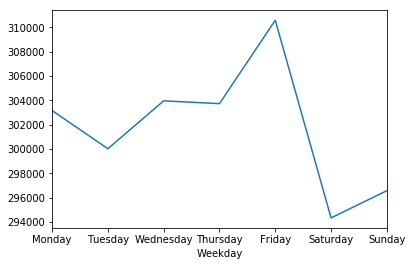

In [219]:
weekday_sales.plot()

In [115]:
## HM
HM_selection = [True, False, False]*5
HM_weekday_sales = mean_sales_each_weekday.iloc[:,HM_selection].sum(axis=1)
## CF
CF_selection = [False, True, False]*5
CF_weekday_sales = mean_sales_each_weekday.iloc[:,CF_selection].sum(axis=1)
## FF
FF_selection = [False, False, True]*5
FF_weekday_sales = mean_sales_each_weekday.iloc[:,FF_selection].sum(axis=1)

In [119]:
HM_weekday_sales

Weekday
Monday       181368.50
Tuesday      180341.75
Wednesday    181304.75
Thursday     179467.25
Friday       181921.00
Saturday     180366.40
Sunday       179456.40
dtype: float64

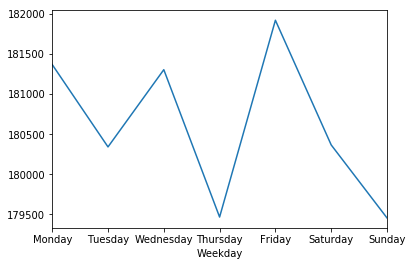

In [116]:
HM_weekday_sales.plot()

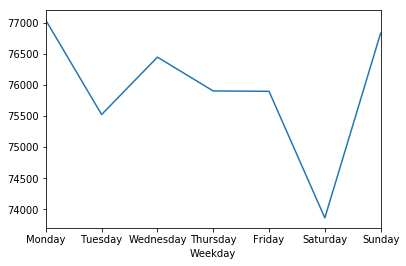

In [117]:
CF_weekday_sales.plot()

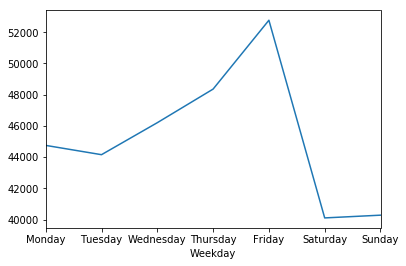

In [218]:
FF_weekday_sales.plot()

In [140]:
first_week = daily_sales.iloc[3:10,:].set_index(['Weekday']).drop(['Day'], axis = 1)
second_week = daily_sales.iloc[10:17,:].set_index(['Weekday']).drop(['Day'], axis = 1)
third_week = daily_sales.iloc[17:24,:].set_index(['Weekday']).drop(['Day'], axis = 1)
fourth_week = daily_sales.iloc[24:31,:].set_index(['Weekday']).drop(['Day'], axis = 1)

In [144]:
four_weeks = pd.DataFrame()
four_weeks['week1'] = first_week.mean(axis = 1)
four_weeks['week2'] = second_week.mean(axis = 1)
four_weeks['week3'] = third_week.mean(axis = 1)
four_weeks['week4'] = fourth_week.mean(axis = 1)

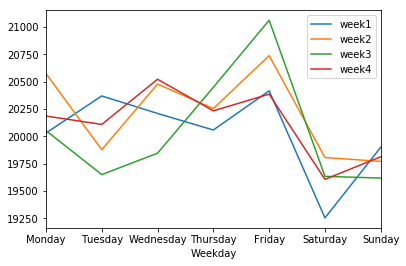

In [147]:
four_weeks.plot()

In [148]:
four_weeks

,week1,week2,week3,week4
Weekday,,,,
Monday,20029.866667,20575.066667,20052.933333,20185.800000
Tuesday,20369.733333,19877.800000,19649.533333,20109.133333
Wednesday,20209.466667,20477.933333,19845.733333,20522.733333
Thursday,20058.000000,20254.533333,20448.800000,20233.266667
Friday,20416.600000,20738.533333,21062.800000,20386.333333
Saturday,19253.066667,19805.800000,19633.266667,19606.266667
Sunday,19900.066667,19770.466667,19617.933333,19813.133333


## Monthly

In [230]:
monthly_sales

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
"Month, Year",,,,,,,,,,,,,,,
Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619
Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586
Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523
Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533
May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695
Jun-16,1235025,535597,321358,1213908,505795,303477,1239785,496319,297791,1217717,487485,292491,1149673,479030,299149
Jul-16,1284426,535177,321106,1269486,508209,317371,1202069,500862,312783,1186438,494349,296609,1220954,508730,305238
Aug-16,1323348,551395,330837,1358134,565889,326218,1283993,534997,320998,1319163,528096,316857,1252825,543317,325990
Sep-16,1284426,535177,334213,1268860,528691,330162,1295077,518454,311072,1279199,532999,319799,1255322,502539,313830


In [173]:
monthly_sales = monthly_sales.set_index(['Month, Year'])
monthly_sales.head()

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
"Month, Year",,,,,,,,,,,,,,,
Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619
Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586
Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523
Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533
May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695


In [184]:
place_kind_sum_up = monthly_sales.sum(axis = 0)

In [185]:
place_kind_sum_up

HM-NE    65362334
CF-NE    27233220
FF-NE    16345942
HM-SW    64421707
CF-SW    26815953
FF-SW    16104137
HM-NW    63572000
CF-NW    26341429
FF-NW    15821178
HM-SE    62328614
CF-SE    26039450
FF-SE    15614539
HM-C     61582375
CF-C     25724566
FF-C     15540968
dtype: int64

In [187]:
place_kind_sum_up_df = pd.DataFrame(place_kind_sum_up.values.reshape(5,3),columns=['HM','CF','FF'],index = ['NE','SW','NW','SE','C'])

In [188]:
place_kind_sum_up_df

,HM,CF,FF
NE,65362334,27233220,16345942
SW,64421707,26815953,16104137
NW,63572000,26341429,15821178
SE,62328614,26039450,15614539
C,61582375,25724566,15540968


In [221]:
place_kind_sum_up_df

,HM,CF,FF
NE,65362334,27233220,16345942
SW,64421707,26815953,16104137
NW,63572000,26341429,15821178
SE,62328614,26039450,15614539
C,61582375,25724566,15540968


In [225]:
place_kind_sum_up_df = place_kind_sum_up_df.rename(columns={"HM":"Hamburger", "CF":"Chicken Fillet", "FF":"Fish Fillet"}, index = {
    "NE":"North East", "NW":"North West", "SE":"South East", "SW":"South West", "C":"Central"
})

In [227]:
place_kind_sum_up_df.to_csv("place_kind_sum_up_df.csv")

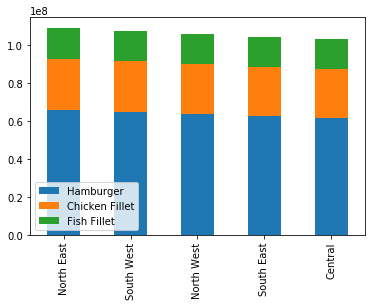

In [226]:
place_kind_sum_up_df.plot.bar(stacked = True)

In [191]:
HM_all_places_sales = monthly_sales.iloc[:,[True, False, False]*5].sum(axis = 1)
CF_all_places_sales = monthly_sales.iloc[:,[False, True, False]*5].sum(axis = 1)
FF_all_places_sales = monthly_sales.iloc[:,[False, False, True]*5].sum(axis = 1)

In [193]:
burger_sales = pd.DataFrame()
burger_sales['HM'] = HM_all_places_sales
burger_sales['CF'] = CF_all_places_sales
burger_sales['FF'] = FF_all_places_sales

In [197]:
burger_sales.head()

,HM,CF,FF
"Month, Year",,,
Jan-16,5598648,2352671,1399660
Feb-16,5840210,2394392,1448157
Mar-16,5909899,2461847,1453511
Apr-16,5799715,2455722,1461148
May-16,6080407,2533501,1507504


In [246]:
burger_sales = burger_sales.reset_index()

burger_sales['Month, Year'] = burger_sales['Month, Year'].apply(lambda x: x[:4]+'20'+x[4:])

burger_sales = burger_sales.set_index('Month, Year')

In [251]:
burger_sales.head()

,Hamburger,Chicken Fillet,Fish Fillet
"Month, Year",,,
Jan-2016,5598648,2352671,1399660
Feb-2016,5840210,2394392,1448157
Mar-2016,5909899,2461847,1453511
Apr-2016,5799715,2455722,1461148
May-2016,6080407,2533501,1507504


In [231]:
burger_sales = burger_sales.rename(columns={"HM":"Hamburger", "CF":"Chicken Fillet", "FF":"Fish Fillet"})

In [252]:
burger_sales.to_csv("burger_sales.csv")

In [253]:
overall_burger_sales = burger_sales.sum(axis = 1)

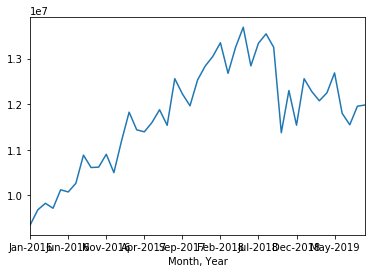

In [255]:
overall_burger_sales.plot()

In [264]:
overall_burger_sales.to_csv("overall_sales.csv")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


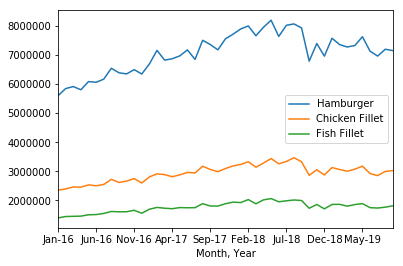

In [234]:
burger_sales.plot()

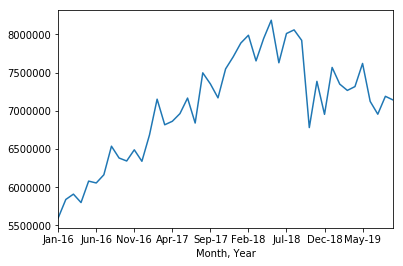

In [198]:
burger_sales['HM'].plot()

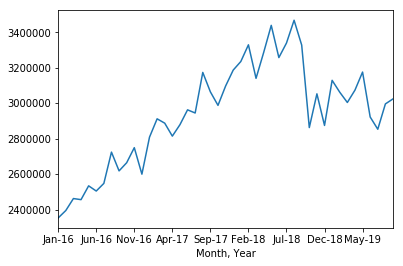

In [199]:
burger_sales['CF'].plot()

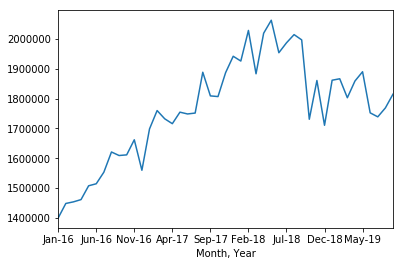

In [200]:
burger_sales['FF'].plot()

In [202]:
monthly_sales.head()

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
"Month, Year",,,,,,,,,,,,,,,
Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619
Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586
Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523
Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533
May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695


In [207]:
places = ['NE','NW','SE','SW','C']
kinds = ['HM','CF','FF']
place_sales = pd.DataFrame()
for place in places:
    place_sales[place] = monthly_sales.apply(lambda x: sum([x[kind+'-'+place] for kind in kinds]),axis=1)

In [209]:
place_sales.head()

,NE,NW,SE,SW,C
"Month, Year",,,,,
Jan-16,1920995,1871601,1825056,1874274,1859053
Feb-16,1959215,1960649,1933574,1969544,1859777
Mar-16,2027678,1939014,1901402,2022124,1935039
Apr-16,1997833,1946570,1908892,1990964,1872326
May-16,2108274,1979297,2013220,2082809,1937812


In [258]:
place_sales = place_sales.reset_index()

place_sales['Month, Year'] = place_sales['Month, Year'].apply(lambda x: x[:4]+'20'+x[4:])

place_sales = place_sales.set_index('Month, Year')

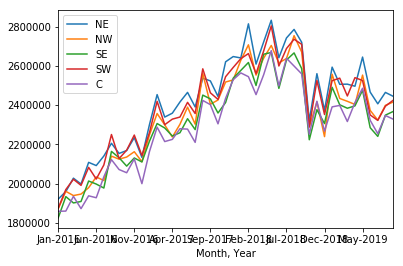

In [259]:
place_sales.plot.line()

In [260]:
overall_place_sales = place_sales.sum(axis = 1)

In [262]:
overall_place_sales.to_csv("overall_place_sales.csv")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [266]:
place_sales = place_sales.rename(columns={"NE":"North East", "NW":"North West", "SE":"South East", 
                                          "SW":"South West", "C":"Central"})

In [268]:
place_sales.head()

,North East,North West,South East,South West,Central
"Month, Year",,,,,
Jan-2016,1920995,1871601,1825056,1874274,1859053
Feb-2016,1959215,1960649,1933574,1969544,1859777
Mar-2016,2027678,1939014,1901402,2022124,1935039
Apr-2016,1997833,1946570,1908892,1990964,1872326
May-2016,2108274,1979297,2013220,2082809,1937812


In [269]:
place_sales.to_csv("place_sales.csv")

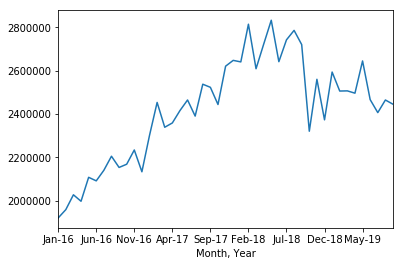

In [211]:
place_sales['NE'].plot.line()

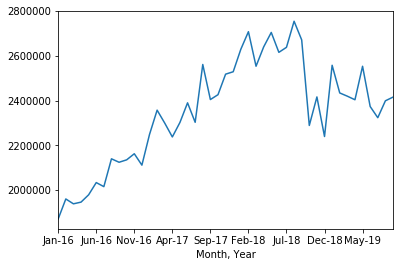

In [212]:
place_sales['NW'].plot.line()

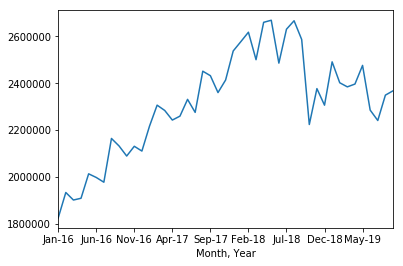

In [213]:
place_sales['SE'].plot.line()

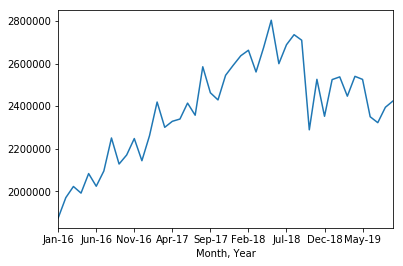

In [214]:
place_sales['SW'].plot.line()

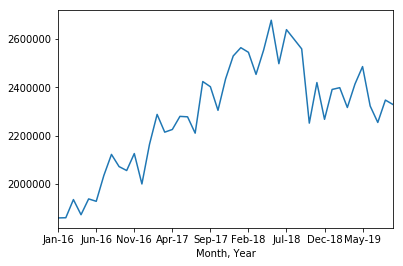

In [215]:
place_sales['C'].plot.line()